# <font color='#3d59c6'> MD004 SESIÓN ESTADÍSTICA DESCRIPTIVA  </font>



Utilizaremos el conjunto de datos **20241106_DataAbalone** para todo el ejemplo

Los abalones o haliótidos (Haliotidae) son una familia de moluscos gasterópodos. 
Son conocidos como orejas de mar, aunque se les conoce con otros nombres dependiendo del país: orea, señoritas, cribias, manquilinas, seis ojos, oreja de Venus, lapa burra y carne de pez

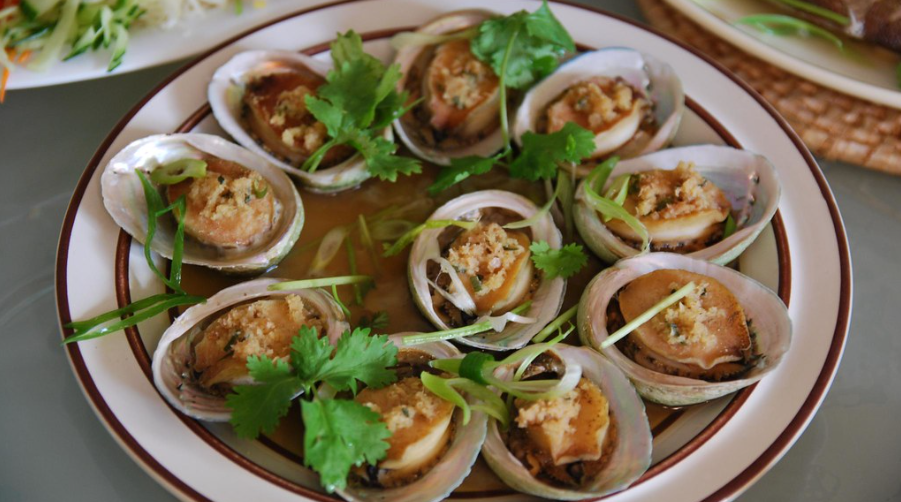


<font color='#3d59c6'>**DATA**</font>: 
- **Sexo** (M: Masculino, F: Femenino, I: Infante) 
- **Longitud** - Medida de la carcasa más larga (milímetros - mm)
- **Diámetro** - mm
- **Altura** - con carne con cáscara (mm)
- **Peso del abulón entero** (gramos)
- **Peso de la carne** (gramos)
- **Peso visceras** después del sangrado (gramos)
- **Peso de la cáscara** - después de secarse (gramos)
- **Anillos**: el valor + 1,5 da la edad en años (p. ej., 4 = 5,5 años)


<font color='#3d59c6'>**OBJETIVO SESIÓN PRÁCTICA:**</font>

- extraer conocimiento a través de los datos
- obtener caracteristicas representativas de nuestras variables
-....

**¿Para qué?**
- validaciones, aportar nueva información de valor, buscaar contestar una pregunta,...

**¿Que tipo de pregunta podriamos responder con este dataset? o ¿qué podriamos solucionar?**
- Imaginemos que los Abalone con Genero=I son más caros y tenemos operarios separandolos a mano, a lo mejor queremos automatizar el proceso programando una máquina que separe los Abalone en 2 grupos (I vs F+M) en función de 'x' parámetros
- ....más ejemplos

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Realizar análisis descriptivo:
    - principales estadísticos
    - análisis diferentes variables
    - graficación
4. Conclusión

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **pastecs:** nos da herramientas para el análisis estadístico básico, especialmente útil para descripciones de datos (funciones: str,stat.desc, table,plot,...)
- **modeest:** la usaremos para el cálculo de la moda y otras medidas de tendencia central
- **vcd:** tiene herramientas para la visualización y el análisis de datos categóricos y tablas de contingencia. Además, complemente ggplo2
- **dplyr:** manipulación y transformación de datos >> group_by(), summarize()
- **scales:** útil para graficación
- **agricolae:** crear tablas de frecuencias agrupadas
- **car:** nos permite crear gráficos de probabilidad (Q-Q plots) para verificar la normalidad de los datos
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.

In [1]:
install.packages("pastecs")
library(pastecs)
install.packages("modeest")
library(modeest) 
install.packages("vcd")
library(vcd)
library(dplyr) #>> manipulación de datasets: group_by(), summarize()
library(scales) #útil para graficación
install.packages("agricolae")
library(agricolae)  #>> crear tablas de frecuencias agrupadas
install.packages("ggplot2")
library(ggplot2) #>> graficación
install.packages("car")
library(car) #lo necesitamos para el qqPlot

also installing the dependency ‘boot’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘timeDate’, ‘cluster’, ‘timeSeries’, ‘spatial’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: grid


Attaching package: ‘dplyr’


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


also installing the dependency ‘AlgDesign’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘agricolae’


The following object is masked from ‘package:modeest’:

    skewness


also installing the depen

ERROR: Error: package or namespace load failed for ‘ggplot2’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘scales’ 1.2.1 is already loaded, but >= 1.4.0 is required


## CARGA DE DATOS

In [2]:
#subimos el fichero 20241106_DataAbalone.csv a nuestro entorno jupyter 
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_ab y checkeamos los datos cargados

data_ab <- read.csv(file='20241106_DataAbalone.csv', header=TRUE, sep=';', dec=',')
head(data_ab)#de forma predefinida retorna las primeras 6 observations
tail(data_ab)#de forma predefinida retorna las últimas 6 observations

head(data_ab,10)#indicamos cuantas observaciones queremos
data_ab[1,]#si queremos mostrar solo una fila concreta

,Id,Genero,Longitud,Diametro,Altura,Peso,Peso.Carne,Peso.visceras,Peso.Carcasa,Anillos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1429,F,0.815,0.65,0.250,2.2550,0.8905,0.4200,0.7975,14
2,2335,F,0.800,0.63,0.195,2.5260,0.9330,0.5900,0.6200,23
3,1210,F,0.780,0.63,0.215,2.6570,1.4880,0.4985,0.5860,11
4,3716,M,0.780,0.60,0.210,2.5480,1.1945,0.5745,0.6745,11
5,1764,M,0.775,0.63,0.250,2.7795,1.3485,0.7600,0.5780,12
6,2091,M,0.775,0.57,0.220,2.0320,0.7350,0.4755,0.6585,17


,Id,Genero,Longitud,Diametro,Altura,Peso,Peso.Carne,Peso.visceras,Peso.Carcasa,Anillos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4172,1430,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
4173,1987,I,0.135,0.130,0.040,0.0290,0.0125,0.0065,0.0080,4
4174,238,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
4175,2115,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
4176,239,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
4177,237,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1


,Id,Genero,Longitud,Diametro,Altura,Peso,Peso.Carne,Peso.visceras,Peso.Carcasa,Anillos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1429,F,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14
2,2335,F,0.800,0.630,0.195,2.5260,0.9330,0.5900,0.6200,23
3,1210,F,0.780,0.630,0.215,2.6570,1.4880,0.4985,0.5860,11
4,3716,M,0.780,0.600,0.210,2.5480,1.1945,0.5745,0.6745,11
5,1764,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
6,2091,M,0.775,0.570,0.220,2.0320,0.7350,0.4755,0.6585,17
7,1763,M,0.770,0.620,0.195,2.5155,1.1155,0.6415,0.6420,12
8,4149,M,0.770,0.605,0.175,2.0505,0.8005,0.5260,0.3550,11
9,2626,M,0.770,0.600,0.215,2.1945,1.0515,0.4820,0.5840,10


,Id,Genero,Longitud,Diametro,Altura,Peso,Peso.Carne,Peso.visceras,Peso.Carcasa,Anillos
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1429,F,0.815,0.65,0.25,2.255,0.8905,0.42,0.7975,14


In [3]:
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data_ab) 

'data.frame':	4177 obs. of  10 variables:
 $ Id           : int  1429 2335 1210 3716 1764 2091 1763 4149 2626 1053 ...
 $ Genero       : chr  "F" "F" "F" "M" ...
 $ Longitud     : num  0.815 0.8 0.78 0.78 0.775 0.775 0.77 0.77 0.77 0.765 ...
 $ Diametro     : num  0.65 0.63 0.63 0.6 0.63 0.57 0.62 0.605 0.6 0.6 ...
 $ Altura       : num  0.25 0.195 0.215 0.21 0.25 0.22 0.195 0.175 0.215 0.22 ...
 $ Peso         : num  2.25 2.53 2.66 2.55 2.78 ...
 $ Peso.Carne   : num  0.89 0.933 1.488 1.194 1.349 ...
 $ Peso.visceras: num  0.42 0.59 0.498 0.575 0.76 ...
 $ Peso.Carcasa : num  0.797 0.62 0.586 0.674 0.578 ...
 $ Anillos      : int  14 23 11 11 12 17 12 11 10 12 ...


Nos indica que nuestro "objeto" es un dataframe, tenemos 4177 observaciones y 10 variables...

## Min;Max

Obtener el valor mínimo y máximo de una variable

In [4]:
cat("El valor mínimo de la variable Longitud es: ", min(data_ab$Longitud))

El valor mínimo de la variable Longitud es:  0.075

In [5]:
cat("El valor máximo de la variable Longitud es: ", max(data_ab$Longitud))

El valor máximo de la variable Longitud es:  0.815

In [6]:
#la función rng constará de un vector de 2 posiciones donde se almacena el mínimo y máximo [min,max].
rng = range(data_ab$Longitud)
rng
rng[1]
rng[2]
cat("min = " ,rng[1],"; max = ",rng[2])

[1] 0.075 0.815

[1] 0.075

[1] 0.815

min =  0.075 ; max =  0.815

## Media

Obtener la media de una variable mediante la función **mean()**

In [7]:
mean(data_ab$Longitud)

#OBSERVACIÓN: Si hay valores faltantes, utilizar na.rm = TRUE (los excluye)
mean(data_ab$Longitud, na.rm = TRUE)

[1] 0.5239921

[1] 0.5239921

In [8]:
#función para saber si existen NA dentro de nuestro dataset
sum(is.na(data_ab))

[1] 0

## Mediana

Obtener la mediana de una variable mediante la función **median()**

¿Qué observamos respecto a la media?

In [9]:
#La medianq se puede calcular con la función median()
median(data_ab$Longitud)
#o con la función quantile()
quantile(data_ab$Longitud, 0.5)

[1] 0.545

50% 
0.545

## Primer y tercer cuartil

Obtener el primer y el tercer cuartil de una variable

In [10]:
#primer cuartil
quantile(data_ab$Longitud, 0.25)
#segundo cuartil
quantile(data_ab$Longitud, 0.75)

25% 
0.45

75% 
0.615

El rango intercuartil (es decir, la diferencia entre el primer y tercer cuartil) se puede calcular con la función IQR()

In [11]:
IQR(data_ab$Longitud)

[1] 0.165

## Desviación estándar y varianza

Calculemos la desviación estándar y la varianza

In [12]:
sd(data_ab$Longitud) #desviación estandard
var(data_ab$Longitud) #variación

[1] 0.1200929

[1] 0.01442231

Para calcular un estadítico para varias variables al mismo tiempo, utilizar **lapply()**

In [13]:
lapply(data_ab[, 3:10], mean)

$Longitud
[1] 0.5239921

$Diametro
[1] 0.4078813

$Altura
[1] 0.1395164

$Peso
[1] 0.8287422

$Peso.Carne
[1] 0.3593675

$Peso.visceras
[1] 0.1805936

$Peso.Carcasa
[1] 0.2388309

$Anillos
[1] 9.933684

In [14]:
lapply(data_ab[, 3:10], var)

$Longitud
[1] 0.01442231

$Diametro
[1] 0.009848551

$Altura
[1] 0.001749503

$Peso
[1] 0.2404814

$Peso.Carne
[1] 0.04926755

$Peso.visceras
[1] 0.01201528

$Peso.Carcasa
[1] 0.01937738

$Anillos
[1] 10.39527

## Coeficiente de variación y Moda

In [15]:
cat("coeficiente de variación: ", sd(data_ab$Longitud) / mean(data_ab$Longitud))

coeficiente de variación:  0.2291884

¿Un coeficiente de variación próximo a 0 qué nos indica en el caso de la variable longitud?

In [16]:
tab = table(data_ab$Anillos) #número de ocurrencias por cada valor
sort(tab, decreasing = TRUE) # ordenamos ascedente o descendente


  9  10   8  11   7  12   6  13  14   5  15  16  17   4  18  19  20   3  21  23 
689 634 568 487 391 267 259 203 126 115 103  67  58  57  42  32  26  15  14   9 
 22  24  27   1   2  25  26  29 
  6   2   2   1   1   1   1   1 

In [17]:
#También lo podemos hacer para una variable categórica
sort(table(data_ab$Genero), decreasing = TRUE)


   M    I    F 
1528 1342 1307 

## Resumen de estimadores

In [18]:
#Una manera más rápida y compacta de obtener todos los estadísticos sería a través de la función summary
summary(data_ab)

       Id          Genero             Longitud        Diametro     
 Min.   :   1   Length:4177        Min.   :0.075   Min.   :0.0550  
 1st Qu.:1045   Class :character   1st Qu.:0.450   1st Qu.:0.3500  
 Median :2089   Mode  :character   Median :0.545   Median :0.4250  
 Mean   :2089                      Mean   :0.524   Mean   :0.4079  
 3rd Qu.:3133                      3rd Qu.:0.615   3rd Qu.:0.4800  
 Max.   :4177                      Max.   :0.815   Max.   :0.6500  
     Altura            Peso          Peso.Carne     Peso.visceras   
 Min.   :0.0000   Min.   :0.0020   Min.   :0.0010   Min.   :0.0005  
 1st Qu.:0.1150   1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.0935  
 Median :0.1400   Median :0.7995   Median :0.3360   Median :0.1710  
 Mean   :0.1395   Mean   :0.8287   Mean   :0.3594   Mean   :0.1806  
 3rd Qu.:0.1650   3rd Qu.:1.1530   3rd Qu.:0.5020   3rd Qu.:0.2530  
 Max.   :1.1300   Max.   :2.8255   Max.   :1.4880   Max.   :0.7600  
  Peso.Carcasa       Anillos      
 Min. 

¿Hay datos atípicos como por ejemplo (-)? ¿qué más podemos extraer de aquí?¿Qué tal la variable peso?

**>>** Podemos decir que Longitud tiene una media de 0.52, y la  mayoría de los registros están por debajo de 0.615, además los valores van entre 0.075 y 0.815

In [19]:
#OBSERVACIÓN: si se necesitan estas estadísticas descriptivas por grupo, use la función by()
by(data_ab, data_ab$Genero, summary)

data_ab$Genero: F
       Id            Genero             Longitud         Diametro     
 Min.   :   3.0   Length:1307        Min.   :0.2750   Min.   :0.1950  
 1st Qu.: 878.5   Class :character   1st Qu.:0.5250   1st Qu.:0.4100  
 Median :2139.0   Mode  :character   Median :0.5900   Median :0.4650  
 Mean   :2043.8                      Mean   :0.5791   Mean   :0.4547  
 3rd Qu.:3150.5                      3rd Qu.:0.6400   3rd Qu.:0.5050  
 Max.   :4176.0                      Max.   :0.8150   Max.   :0.6500  
     Altura           Peso         Peso.Carne     Peso.visceras   
 Min.   :0.015   Min.   :0.080   Min.   :0.0310   Min.   :0.0210  
 1st Qu.:0.140   1st Qu.:0.730   1st Qu.:0.2950   1st Qu.:0.1590  
 Median :0.160   Median :1.038   Median :0.4405   Median :0.2240  
 Mean   :0.158   Mean   :1.047   Mean   :0.4462   Mean   :0.2307  
 3rd Qu.:0.175   3rd Qu.:1.320   3rd Qu.:0.5733   3rd Qu.:0.2973  
 Max.   :1.130   Max.   :2.657   Max.   :1.4880   Max.   :0.5900  
  Peso.Carcasa  

In [20]:
stat.desc(data_ab[, 3:10])
#OBSERVACIÓN: para tener más métricas (es decir, prueba de asimetría, curtosis y normalidad) agregando el argumento norm = TRUE
#stat.desc(data_ab[, 3:10], norm = TRUE)

#nbr.val (número de valores)
#nbr.null (número de valores null)
#nbr.na (número de missing)
#range (diferencia max-min)
#sum (suma de los valores no missing)
#SE.mean  (error estándar sobre la media)
#CI.mean.0.95 (intervalo de confianza)

,Longitud,Diametro,Altura,Peso,Peso.Carne,Peso.visceras,Peso.Carcasa,Anillos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
nbr.null,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,7.500000e-02,5.500000e-02,0.000000e+00,2.000000e-03,1.000000e-03,5.000000e-04,1.500000e-03,1.000000e+00
max,8.150000e-01,6.500000e-01,1.130000e+00,2.825500e+00,1.488000e+00,7.600000e-01,1.005000e+00,2.900000e+01
range,7.400000e-01,5.950000e-01,1.130000e+00,2.823500e+00,1.487000e+00,7.595000e-01,1.003500e+00,2.800000e+01
sum,2.188715e+03,1.703720e+03,5.827600e+02,3.461656e+03,1.501078e+03,7.543395e+02,9.975965e+02,4.149300e+04
median,5.450000e-01,4.250000e-01,1.400000e-01,7.995000e-01,3.360000e-01,1.710000e-01,2.340000e-01,9.000000e+00
mean,5.239921e-01,4.078813e-01,1.395164e-01,8.287422e-01,3.593675e-01,1.805936e-01,2.388309e-01,9.933684e+00


In [21]:
stat.desc(data_ab$Longitud)

nbr.val     nbr.null       nbr.na          min          max        range 
4.177000e+03 0.000000e+00 0.000000e+00 7.500000e-02 8.150000e-01 7.400000e-01 
         sum       median         mean      SE.mean CI.mean.0.95          var 
2.188715e+03 5.450000e-01 5.239921e-01 1.858169e-03 3.643000e-03 1.442231e-02 
     std.dev     coef.var 
1.200929e-01 2.291884e-01

## Tabla de contingencia

In [22]:
#en este caso se usará la función table() - bajo dos variables cualitativas-
#crearemos una variable extra categorica al solo tener la de género
data_ab$Peso.Carne_cat <- ifelse(data_ab$Peso.Carne < median(data_ab$Peso.Carne),"pesoinf_m", "pesosup_m")
table(data_ab$Peso.Carne_cat)


pesoinf_m pesosup_m 
     2087      2090 

In [23]:
#podemos crear la tabla de contigencias mediante las funciones table() pero también mediante xtabs
table(data_ab$Genero, data_ab$Peso.Carne_cat)
xtabs(~ data_ab$Genero + data_ab$Peso.Carne_cat)

   
    pesoinf_m pesosup_m
  F       410       897
  I      1154       188
  M       523      1005

              data_ab$Peso.Carne_cat
data_ab$Genero pesoinf_m pesosup_m
             F       410       897
             I      1154       188
             M       523      1005

In [24]:
#lo mismo pero por frecuencias relativas
t_ab = table(data_ab$Genero, data_ab$Peso.Carne_cat)
round(prop.table(table(data_ab$Genero, data_ab$Peso.Carne_cat)), 2)
round(prop.table(t_ab), 2)

   
    pesoinf_m pesosup_m
  F      0.10      0.21
  I      0.28      0.05
  M      0.13      0.24

   
    pesoinf_m pesosup_m
  F      0.10      0.21
  I      0.28      0.05
  M      0.13      0.24

In [25]:
# % por fila:
print("% por filas")
round(prop.table(table(data_ab$Genero, data_ab$Peso.Carne_cat), 1), 2) #con la función round() redondeamos a 'x' dígitos
# % por columna:
print("% por columnas")
round(prop.table(table(data_ab$Genero, data_ab$Peso.Carne_cat), 2), 2)

[1] "% por filas"


   
    pesoinf_m pesosup_m
  F      0.31      0.69
  I      0.86      0.14
  M      0.34      0.66

[1] "% por columnas"


   
    pesoinf_m pesosup_m
  F      0.20      0.43
  I      0.55      0.09
  M      0.25      0.48

## Tablas de frecuencias

In [26]:
#Podemos crear una tabla de frecuencias a partir de una variable continua
Fabs = hist(data_ab$Longitud, plot=FALSE)
Tabla1 = table.freq(Fabs)

Fabs
Tabla1

$breaks
 [1] 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75
[16] 0.80 0.85

$counts
 [1]   1   7  41  57 122 180 287 372 524 637 733 728 336 136  15   1

$density
 [1] 0.004788125 0.033516878 0.196313143 0.272923151 0.584151305 0.861862581
 [7] 1.374192004 1.781182667 2.508977735 3.050035911 3.509695954 3.485755327
[13] 1.608810151 0.651185061 0.071821882 0.004788125

$mids
 [1] 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625
[13] 0.675 0.725 0.775 0.825

$xname
[1] "data_ab$Longitud"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

Lower,Upper,Main,Frequency,Percentage,CF,CPF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.05,0.10,0.075,1,0.0,1,0.0
0.10,0.15,0.125,7,0.2,8,0.2
0.15,0.20,0.175,41,1.0,49,1.2
0.20,0.25,0.225,57,1.4,106,2.5
0.25,0.30,0.275,122,2.9,228,5.5
0.30,0.35,0.325,180,4.3,408,9.8
0.35,0.40,0.375,287,6.9,695,16.6
0.40,0.45,0.425,372,8.9,1067,25.5
0.45,0.50,0.475,524,12.5,1591,38.1


## TOP N

Cuando queramos listar por ordenación partiendo de una variable y seleccionar los Top n:

In [27]:
#columnas que nos interesan:
col = c('Id'
        ,'Peso.Carne')

#pintamos la lista
head(data_ab[,(col)][order(-data_ab$Peso.Carne),], 10)

,Id,Peso.Carne
,<int>,<dbl>
3,1210,1.4880
59,1529,1.3510
5,1764,1.3485
62,2812,1.2530
125,3714,1.2455
47,3600,1.2395
49,3008,1.2395
18,1428,1.2320
14,1208,1.1965


## GRAFICOS

## Barplot

**>>** solo sobre en variables <b>cualitativas</b>

**>>** se usa para visualizar la distribución de una variable cualitativa

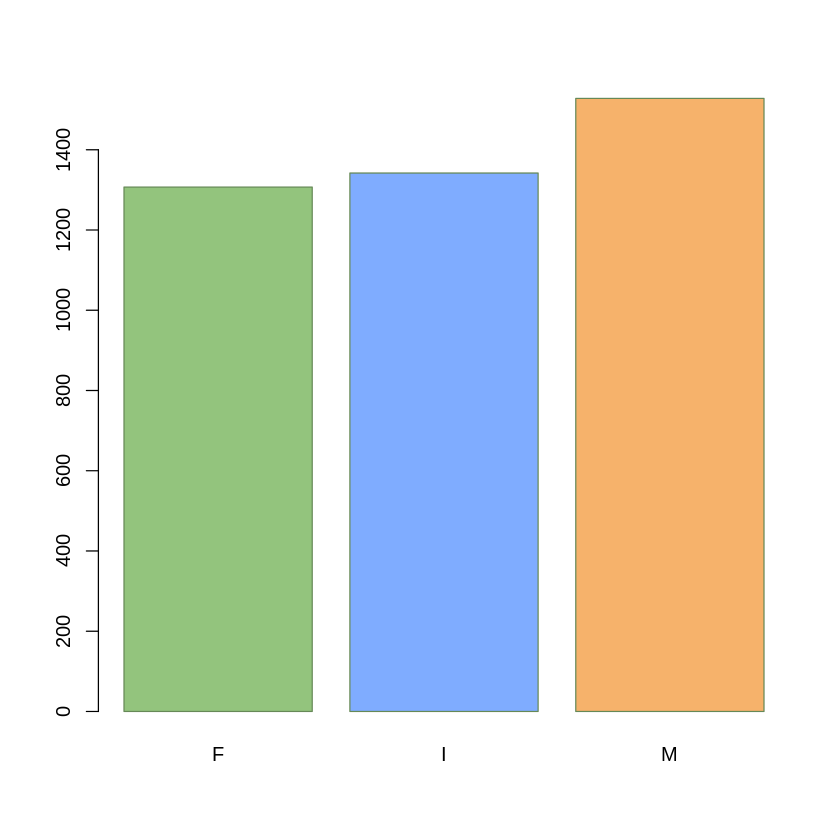

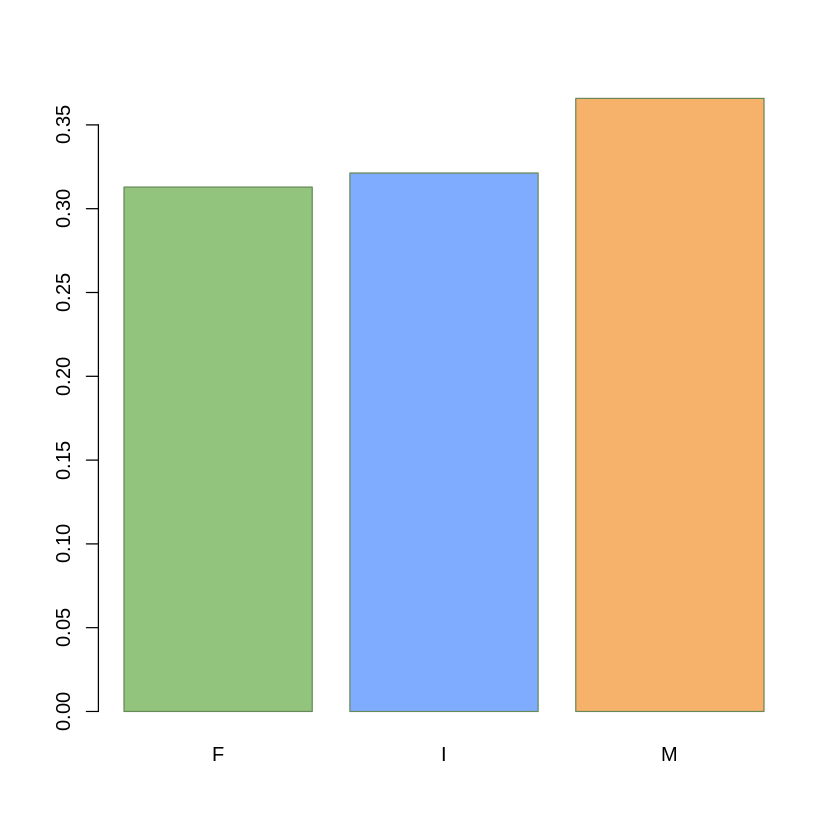

In [28]:
barplot(table(data_ab$Genero)
        ,col=c("#93c47d","#7facff","#f6b26b")
        ,border="#668957") #partiremos del resultado de table()

#también se puede realizar sobre tabla de frecuencias relativas
barplot(prop.table(table(data_ab$Genero))
        ,col=c("#93c47d","#7facff","#f6b26b")
        ,border="#668957")

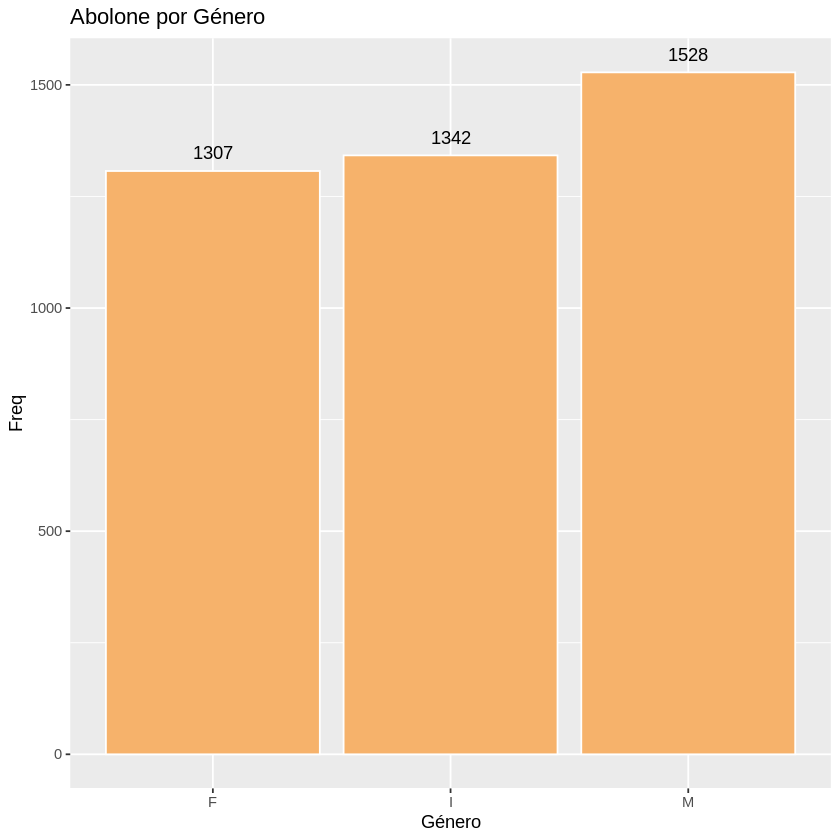

In [29]:
plotdata = data_ab %>%
 count(Genero) #esta será nuestra n
ggplot(plotdata, 
       aes(x = Genero 
           ,y = n)) + 
 geom_bar(stat = "identity" #le indicamos que ya está calculada la frecuencia y que coja esa
         ,fill = "#f6b26b" #color de relleno
         ,color = "white") + #color borde
 geom_text(aes(label = n) 
          ,vjust=-0.9) + #dónde coloca el valor
 labs(x = "Género" #título eje x
      ,y = "Freq" #título eje y
      ,title = "Abolone por Género") #título del gráfico

## Mosaico

Nos permite ver la relación entre variables categóricas las áreas de los rectángulos representan la
proporción de las diferentes combinaciones.

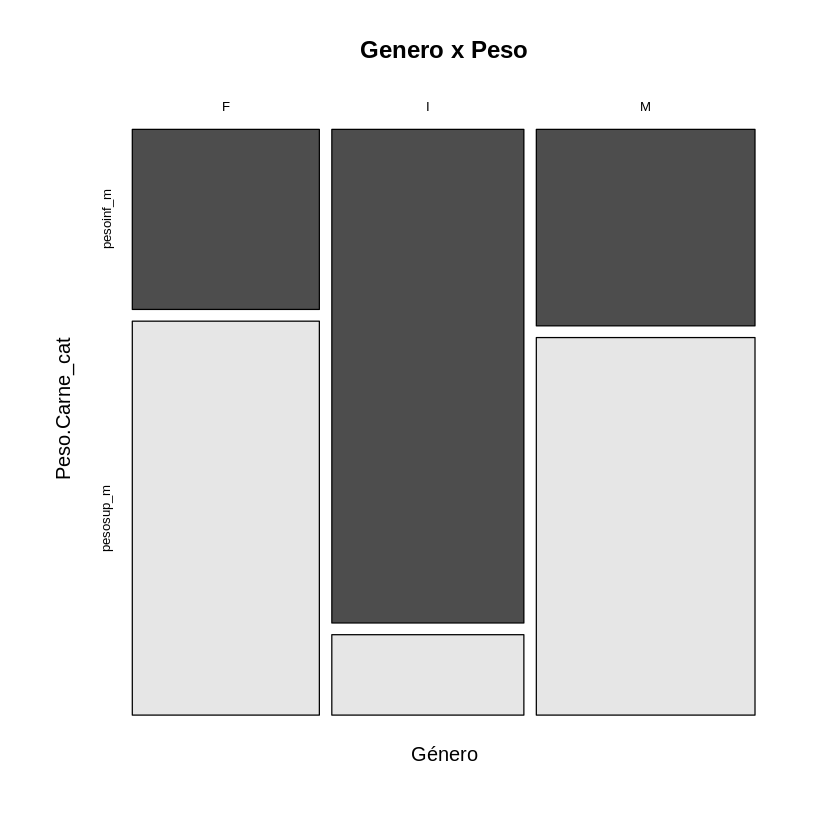

In [30]:
#Un diagrama de mosaico permite visualizar una tabla de contingencia de dos variables cualitativas:
mosaicplot(table(data_ab$Genero, data_ab$Peso.Carne_cat),
  ,main = "Genero x Peso"
  ,color = TRUE #
  ,xlab = "Género" #eje de las x
  ,ylab = "Peso.Carne_cat" #eje de las y
)

## Histogramas

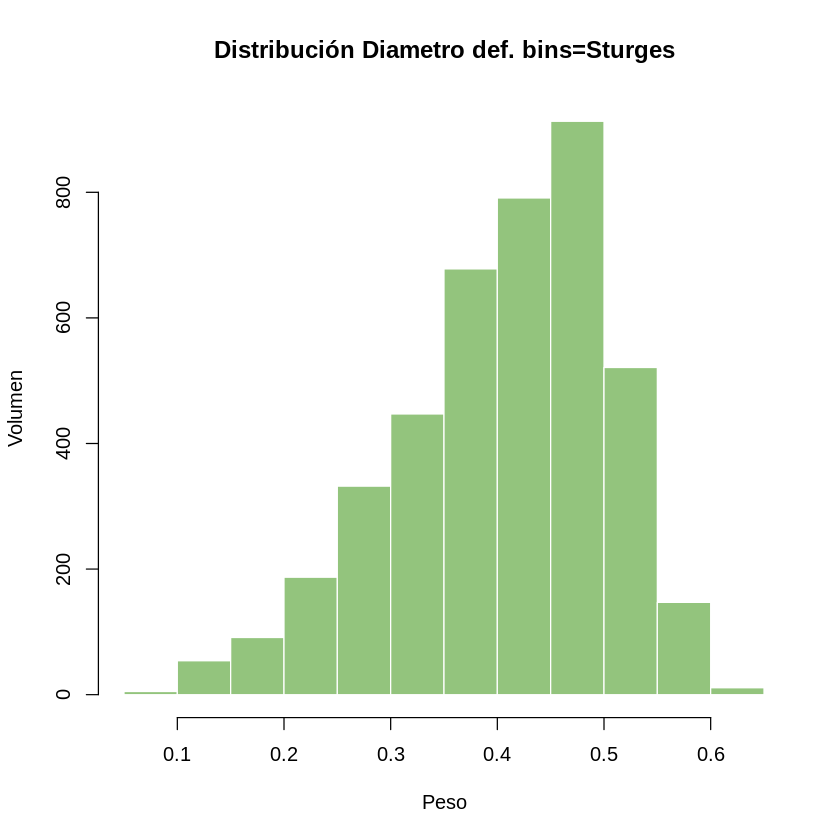

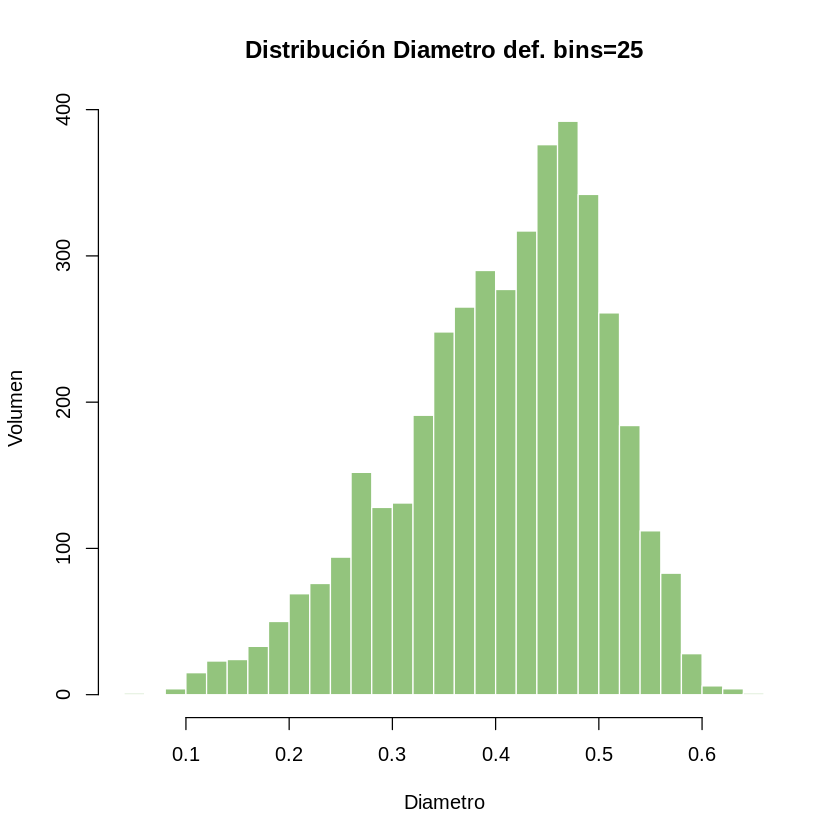

In [31]:
hist(data_ab$Diametro #índicamos variable
     ,main = "Distribución Diametro def. bins=Sturges" #título del gráfico
     ,breaks="Sturges" #particiones
     ,xlab = "Peso" #nombre variable eje x
     ,ylab = "Volumen" #nombre variable eje y
     ,col = "#93c47d" #color de relleno
     ,border="white") #color de contorno
hist(data_ab$Diametro 
     ,main = "Distribución Diametro def. bins=25"
     ,breaks=25 #aquí se le indica el núm de bins de forma manual
     ,xlab = "Diametro" 
     ,ylab = "Volumen" 
     ,col = "#93c47d"
     ,border="white")

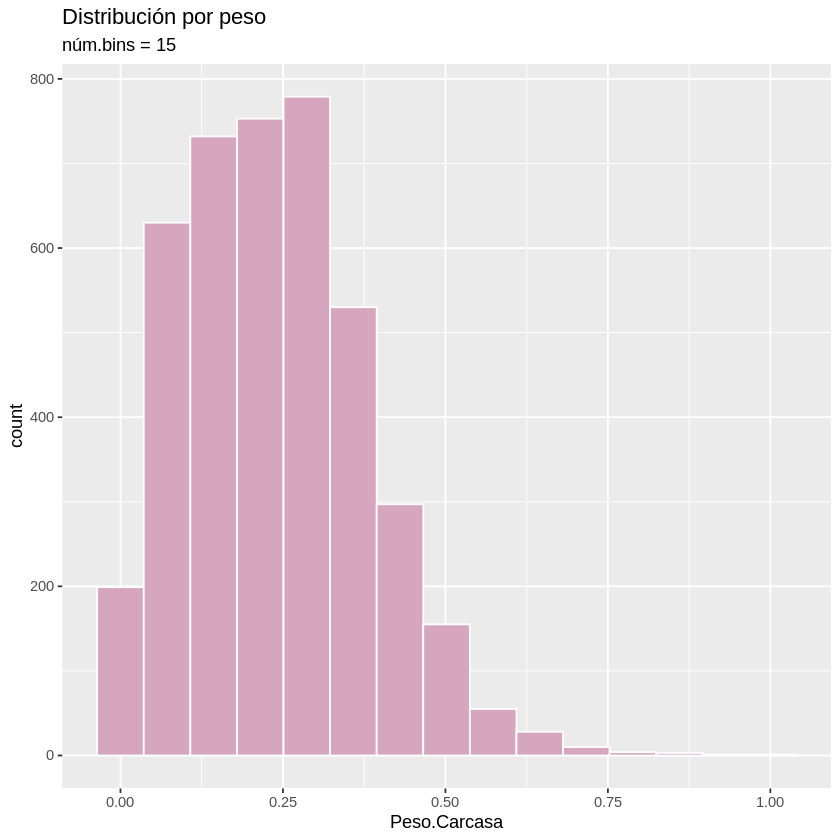

In [32]:
ggplot(data_ab) + #señalamos el dataframe
  aes(x = Peso.Carcasa) + #indicamos la variable 
  geom_histogram(bins = 15 #indicamos número de bins
                ,fill = "#d5a6bd"#color de relleno
                ,color = "white") + #color del contorno
  labs(title="Distribución por peso" #título del gráfico
      ,subtitle = "núm.bins = 15"
      ,x = "Peso.Carcasa")  #nombre variable eje x

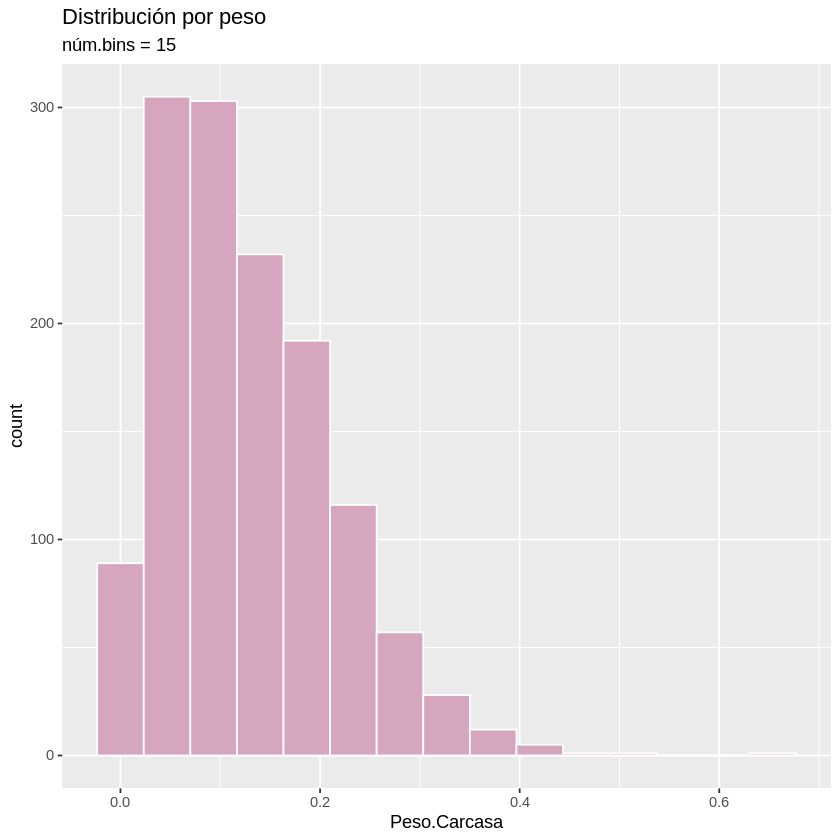

In [33]:
#mismo gráfico pero filtramos
data_ab %>%
filter( Genero=='I') %>%
ggplot(aes(x = Peso.Carcasa)) + #indicamos la variable 
  geom_histogram(bins = 15 #indicamos número de bins
                ,fill = "#d5a6bd"#color de relleno
                ,color = "white") + #color del contorno
  labs(title="Distribución por peso" #título del gráfico
      ,subtitle = "núm.bins = 15"
      ,x = "Peso.Carcasa")  #nombre variable eje x

## Boxplot 

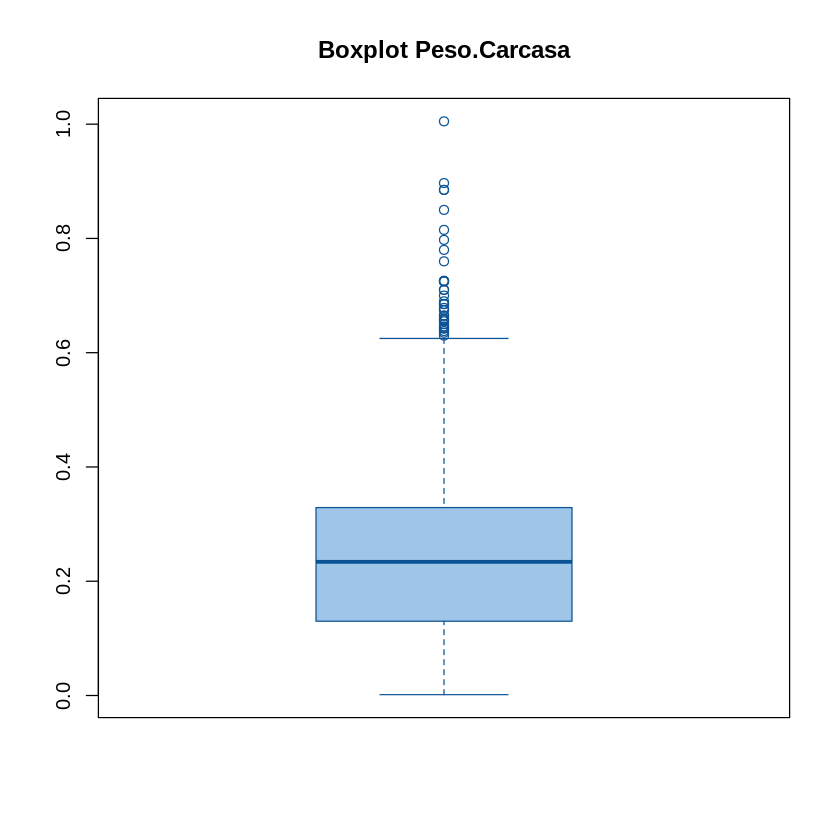

In [34]:
boxplot(data_ab$Peso.Carcasa
        ,col = "#9fc5e8"
        ,border="#0b5394"
        ,main = "Boxplot Peso.Carcasa" #título del gráfico
        )

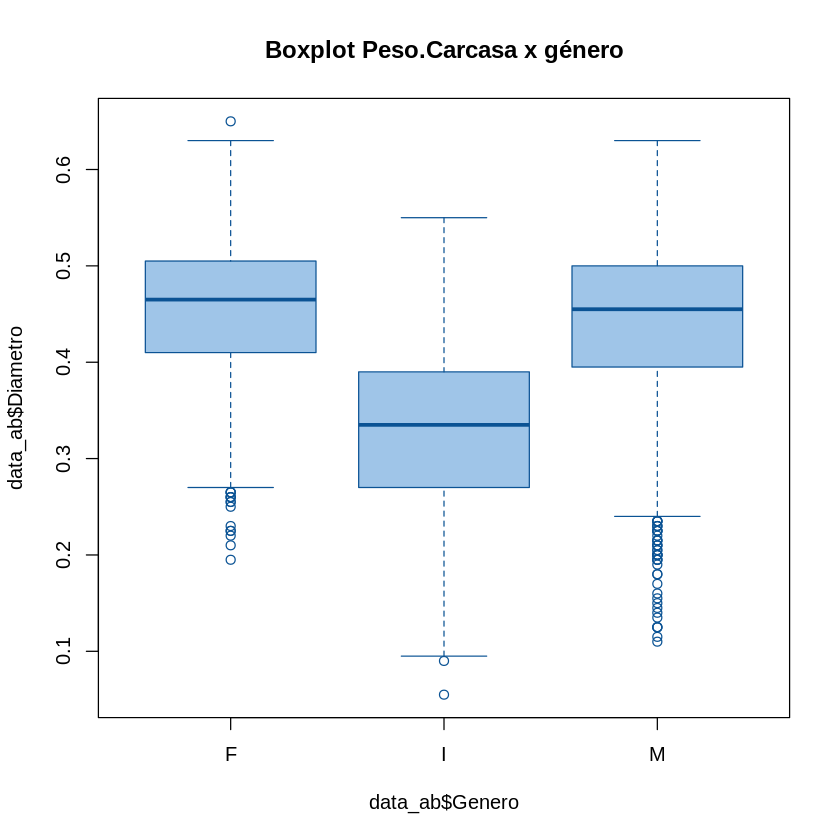

In [35]:
boxplot(data_ab$Diametro ~ data_ab$Genero
        ,col = "#9fc5e8"
        ,border="#0b5394"
        ,main = "Boxplot Peso.Carcasa x género" #título del gráfico        
        )

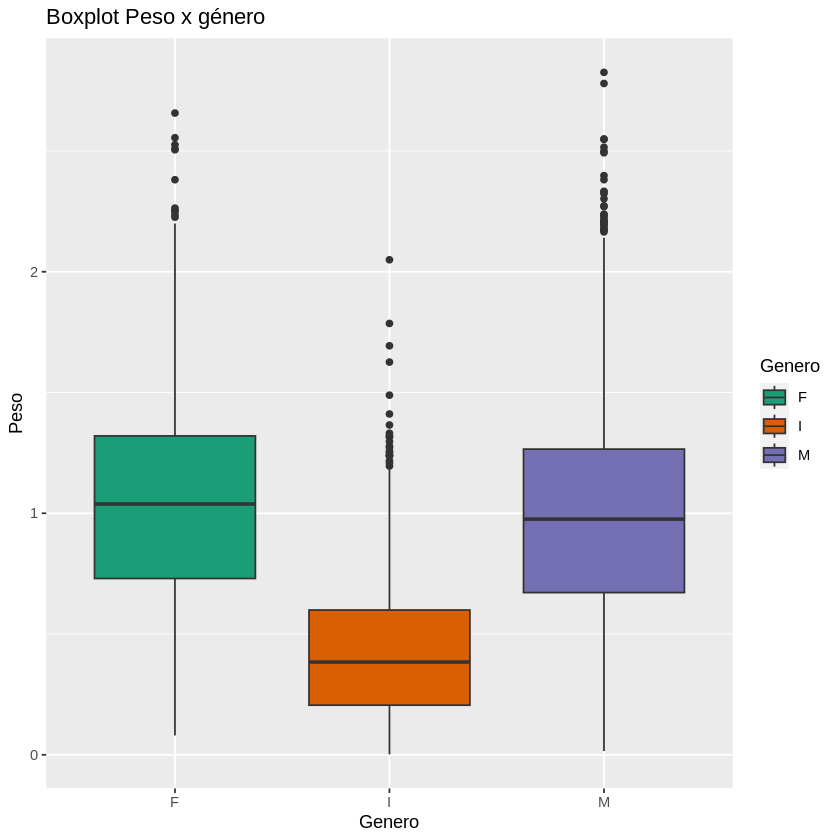

In [36]:
ggplot(data_ab) +
  aes(x = Genero, y = Peso, fill=Genero) + #a través delparámetro fill le indicamos que pinte por género
  geom_boxplot() +
  scale_fill_brewer(palette="Dark2")+ #le indicamos que use la paleta de colores 'x'
  labs(title = "Boxplot Peso x género" ) #+
  #geom_jitter(color="#9fc5e8", size=0.7, alpha=0.5) #para visualizar la distribución de los registros (si resulta de ayuda)

## Scatterplot

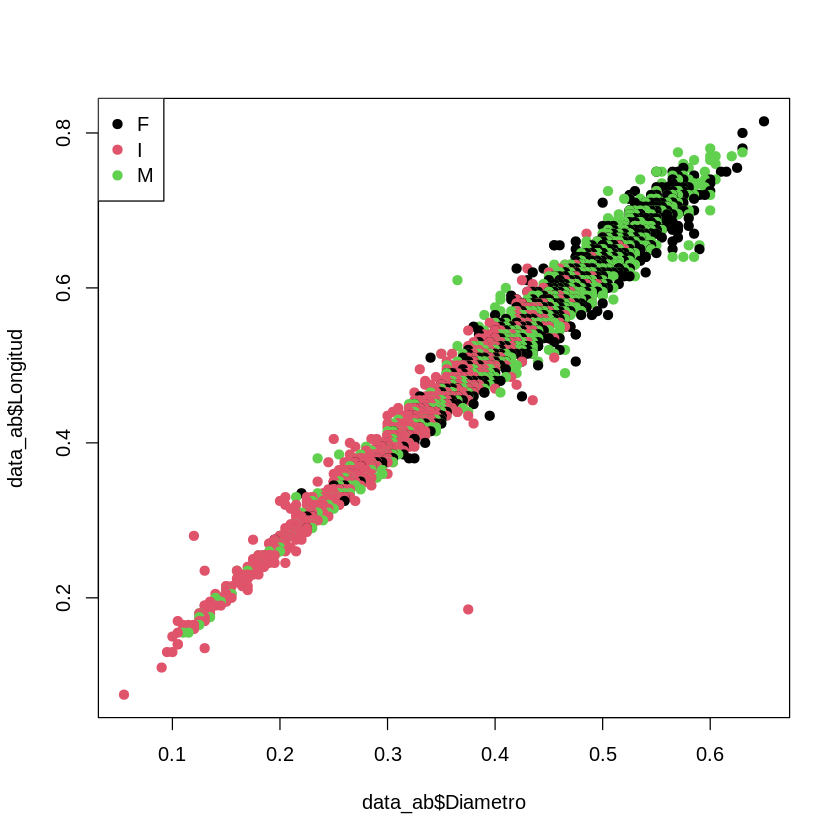

In [37]:
plot(data_ab$Diametro, data_ab$Longitud,pch = 19,col = factor(data_ab$Genero))
legend("topleft"
       ,legend = levels(factor(data_ab$Genero))
       ,pch = 19 #indica el tipo de forma, en este caso dots
       ,col = factor(levels(factor(data_ab$Genero))))

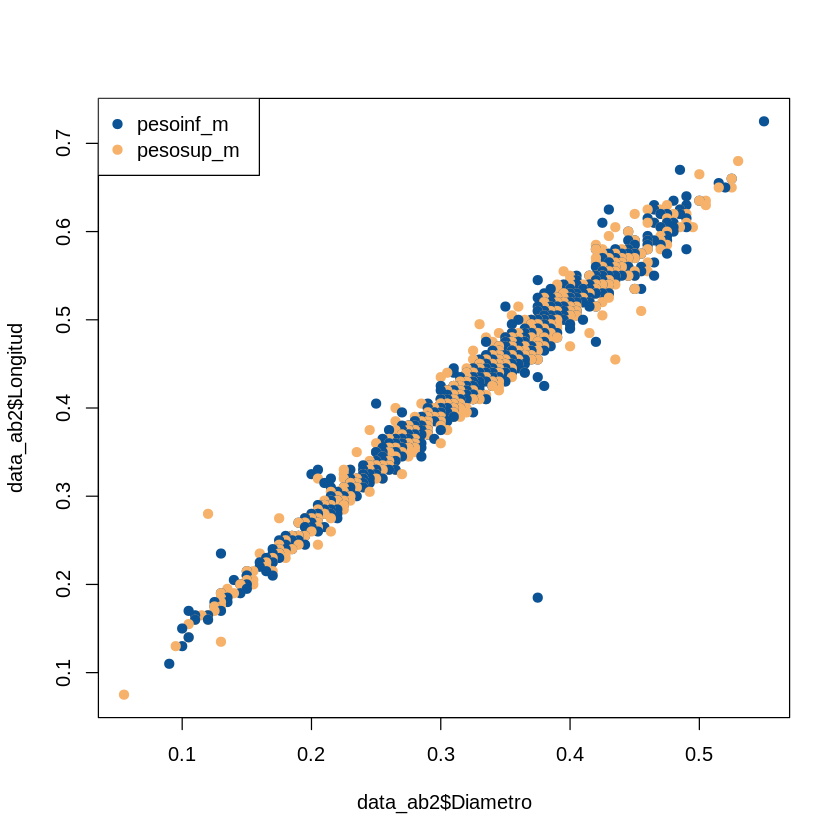

In [38]:
data_ab2 = data_ab[data_ab$Genero=="I",]
plot(data_ab2$Diametro, data_ab2$Longitud,pch = 19 ,col = c("#0b5394","#f6b26b"))
# Legend
legend("topleft"
       ,legend = levels(factor(data_ab2$Peso.Carne_cat))
       ,pch = 19
       ,col = c("#0b5394","#f6b26b"))

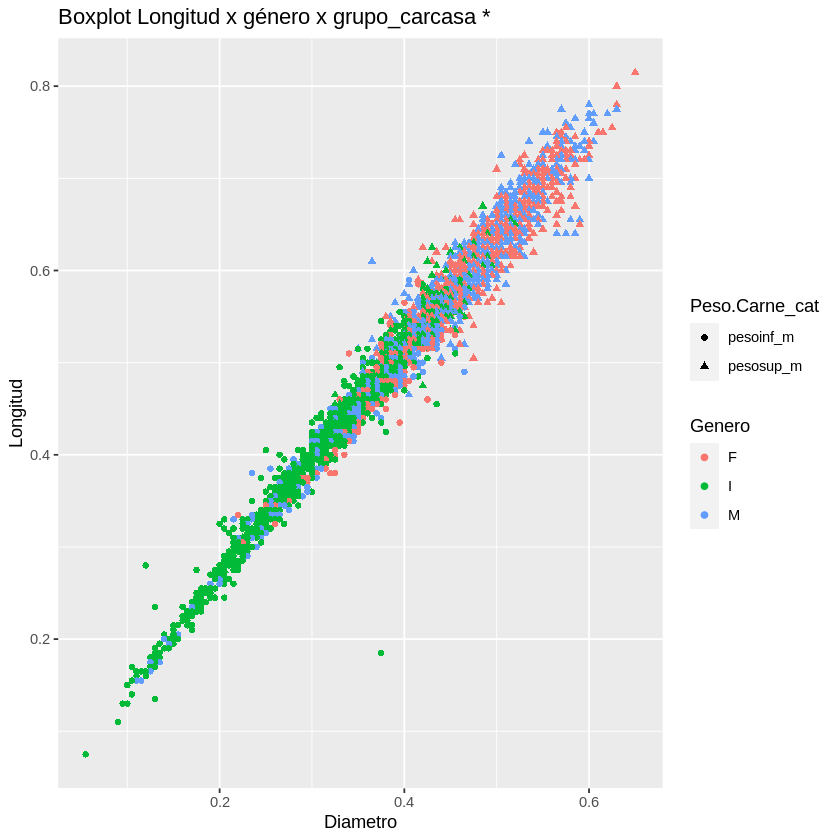

In [39]:
ggplot(data_ab) +
  aes(x = Diametro
      , y = Longitud
      , colour = Genero
      , shape = Peso.Carne_cat) + #shape le añade una capa extra de información
  scale_fill_brewer(palette="Dark2")+
  geom_point() +
  scale_color_hue() +
  labs(title = "Boxplot Longitud x género x grupo_carcasa * " )

## Gráfico QQ

Generaremos este gráfico cuando queramos ver visualmente de una forma rápida si nuestra variable muestral mantiene o no de una distribución, en este caso la normal

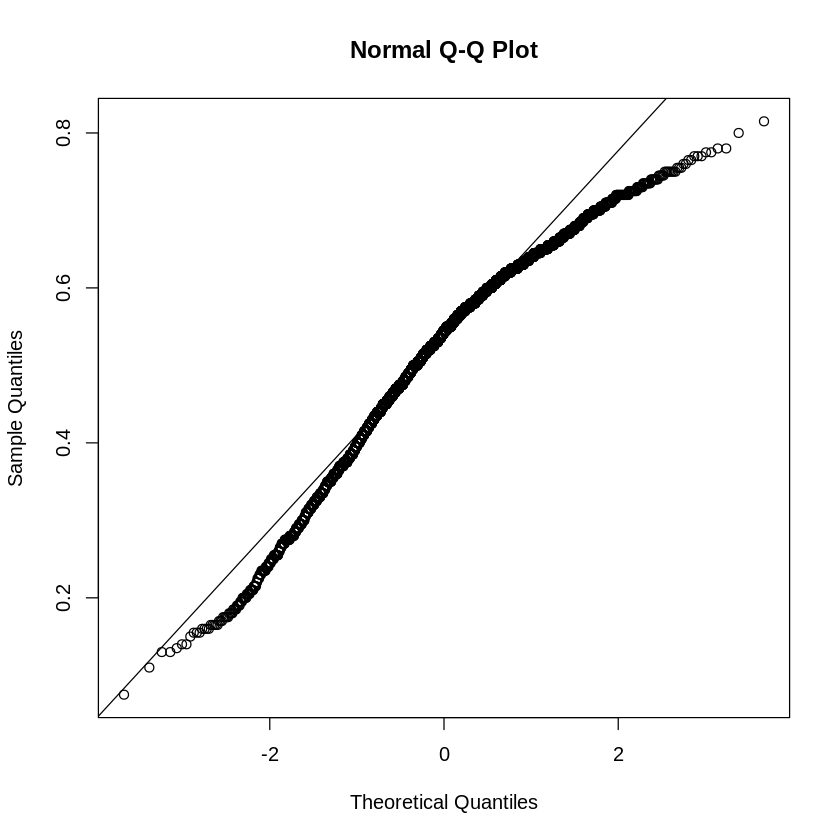

In [40]:
# Draw points on the qq-plot:
qqnorm(data_ab$Longitud)
# Draw the reference line:
qqline(data_ab$Longitud)

[1] 4177 4176

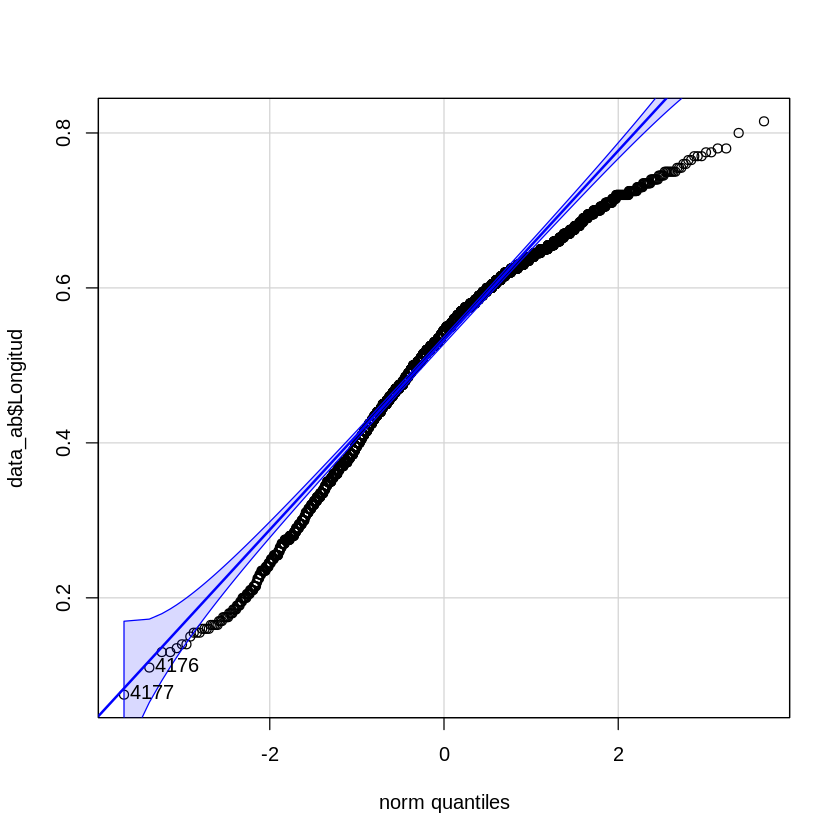

In [41]:
#otra forma de obtener el gráfico sería:
qqPlot(data_ab$Longitud)

## Density plot

Es la representación de la distribución de una variable numérica, vendría siendo un histograma suavizado donde el área debajo de la curva es 1

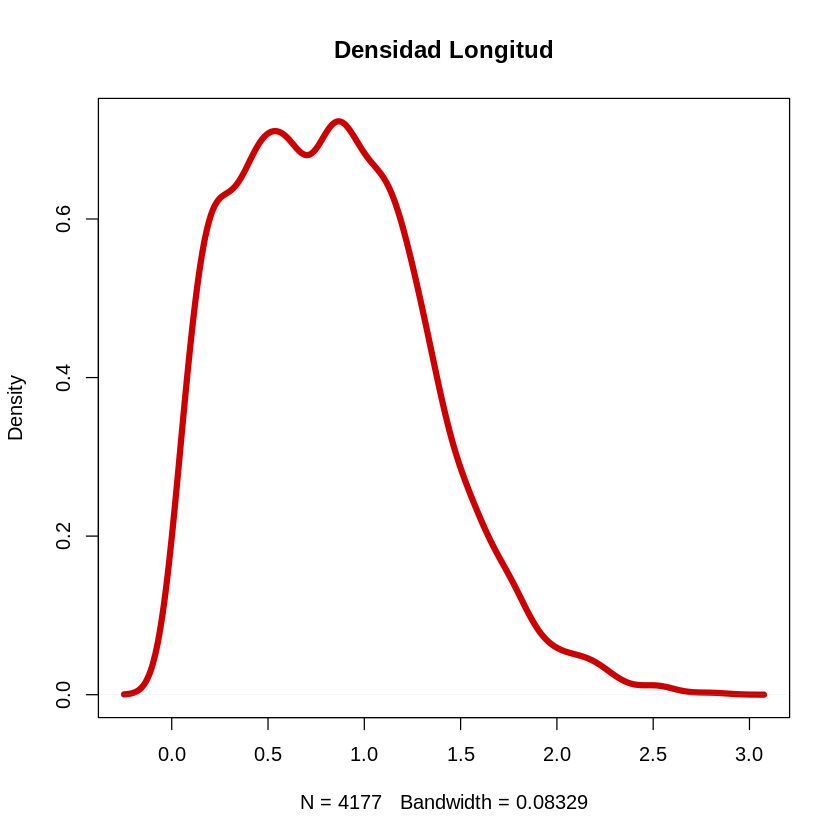

In [42]:
plot(density(data_ab$Peso)
        ,col = "#cc0000"
        , lwd = 5
        ,main = "Densidad Longitud" #título del gráfico
    )

¿Qué puede ocurrir aquí?

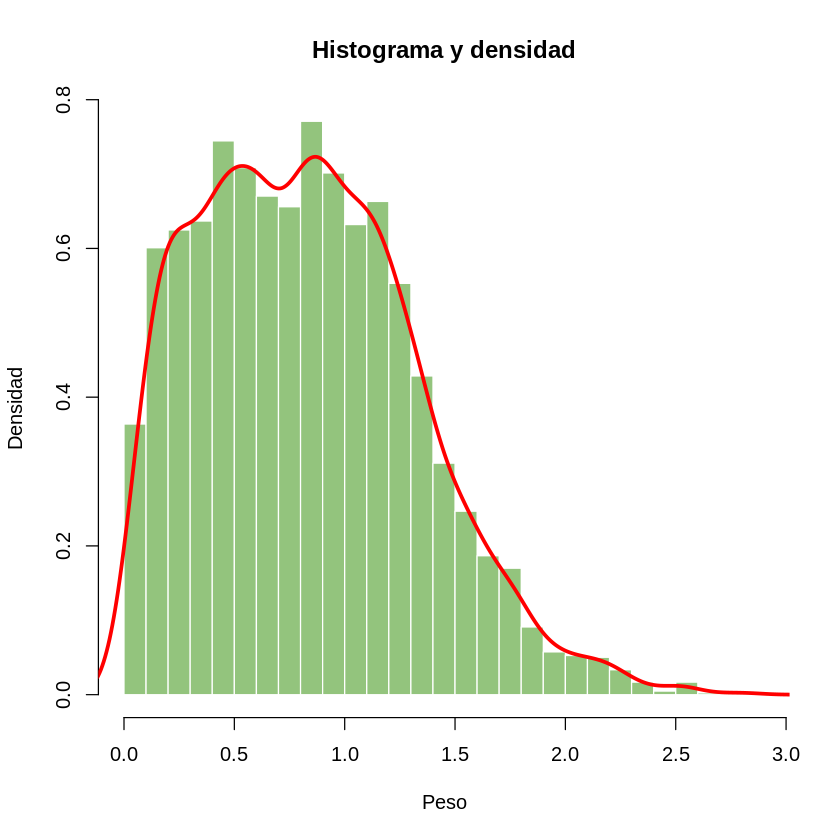

In [43]:
hist(data_ab$Peso 
     , freq = FALSE
     ,main = "Histograma y densidad"
     ,breaks=25 #aquí se le indica el núm de bins de forma manual
     ,xlab = "Peso" 
     ,ylab = "Densidad" 
     ,col = "#93c47d"
     ,border="white")
# Añadimos la línea de densidad
lines(density(data_ab$Peso), lwd = 3, col = "red")

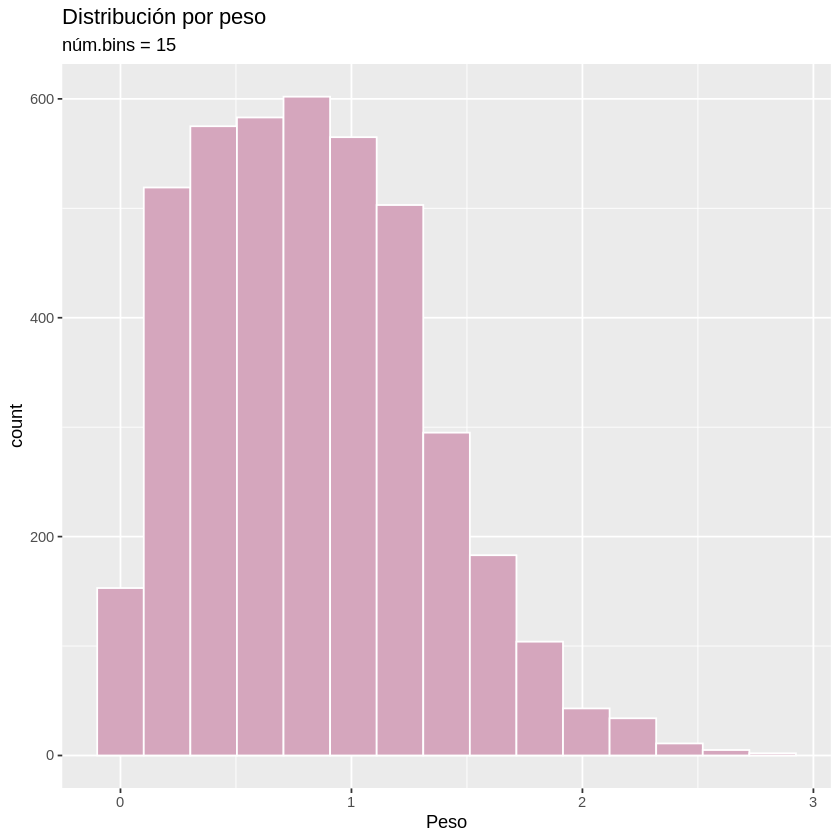

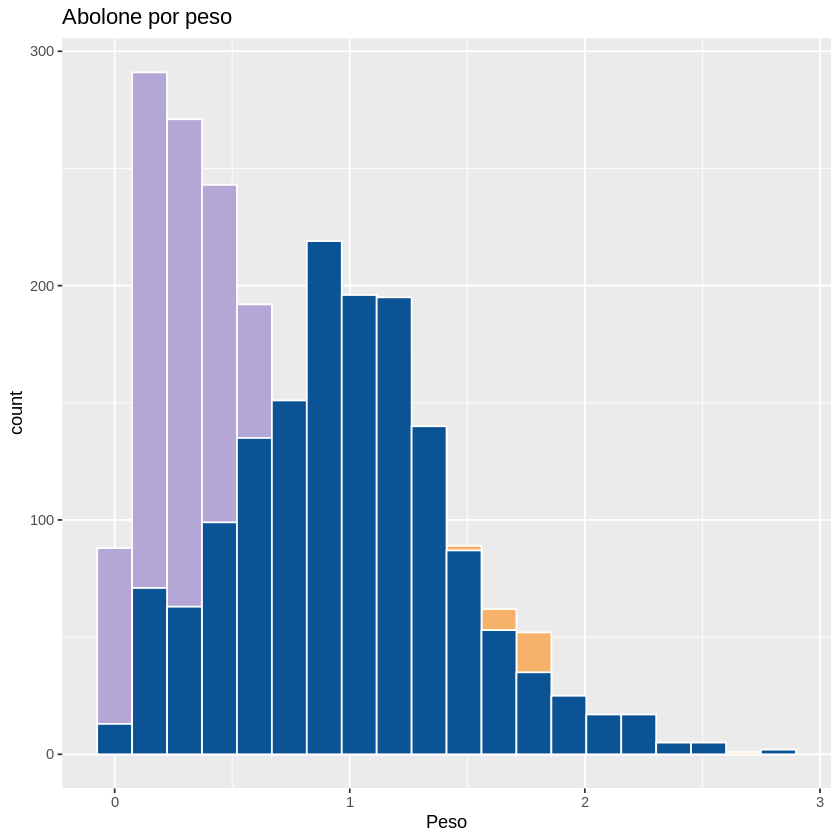

In [44]:
ggplot(data_ab) + #señalamos el dataframe
  aes(x = Peso) + #indicamos la variable 
  geom_histogram(bins = 15 #indicamos número de bins
                ,fill = "#d5a6bd"#color de relleno
                ,color = "white") + #color del contorno
  labs(title="Distribución por peso" #título del gráfico
      ,subtitle = "núm.bins = 15"
      ,x = "Peso")  #nombre variable eje x

data_ab %>% 
ggplot(aes(x = Peso)) + 
  geom_histogram(data = subset(data_ab,Genero=="I"),fill="#b4a7d6", colour= "white", bins = 20)+
  geom_histogram(data = subset(data_ab,Genero=="F"),fill= "#f6b26b", colour= "white", bins = 20) +
  geom_histogram(data = subset(data_ab,Genero=="M"),fill="#0b5394", colour= "white", bins = 20) +
  labs(title = "Abolone por peso")

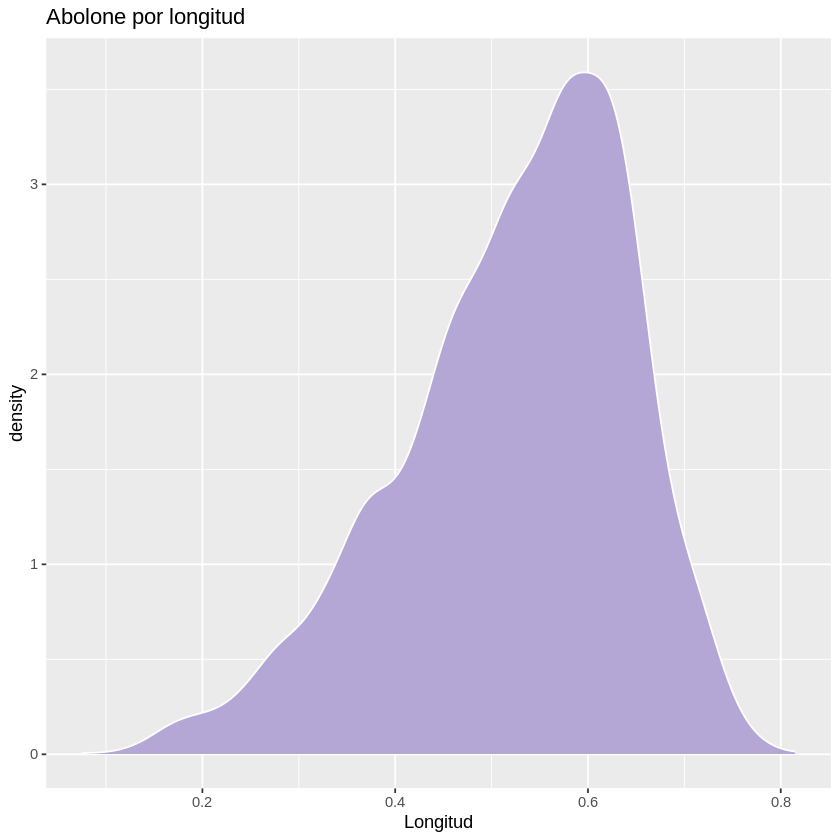

In [45]:
ggplot(data_ab, aes(x = Longitud)) +
 geom_density(fill = "#b4a7d6"
             ,color = "white") + 
 labs(title = "Abolone por longitud")

## Origen Dataset y Referencias

- **code.datasciencedojo**: https://code.datasciencedojo.com/datasciencedojo/datasets/blob/master/Abalone/README.md
- **Wikipedia.Haliotis**: https://es.wikipedia.org/wiki/Abalone

Autor Ejemplo: Gloria Aguilera Pérez